# Importação de bibliotecas e banco de dados

In [1]:
import pandas as pd
import statistics as sts
import numpy as np

In [2]:
df = pd.read_excel("titanic3.xls")
o_df = df
df.tail()
# Aqui observamos a disposição do banco de dados

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


# Checagem dos atributos e instâncias

In [3]:
tam = df.shape
print(f"Linhas = {tam[0]}\nColunas = {tam[1]}")
# Verificar o tamanho dos atributos e registros

Linhas = 1309
Colunas = 14


In [4]:
df.info()
# Existem 3 tipos de dados - int, float e object. Teremos que transformar futuramente o object para linguagem binária.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [5]:
df.isnull().sum()
# Existem muitos registros nulos em alguns atributos.

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

# Limpeza de dados

In [6]:
df = df.drop(["cabin","boat","body", "home.dest", "name", "ticket"],axis=1)
df.tail()
# Cabin, boat, body são descartados pela ausência muito grande de dados - já name, home.dest e ticket não terão utilidade.

,pclass,survived,sex,age,sibsp,parch,fare,embarked
1304,3,0,female,14.5,1,0,14.4542,C
1305,3,0,female,NaN,1,0,14.4542,C
1306,3,0,male,26.5,0,0,7.2250,C
1307,3,0,male,27.0,0,0,7.2250,C
1308,3,0,male,29.0,0,0,7.8750,S


In [7]:
df["sex"].value_counts(dropna = False)

male      843
female    466
Name: sex, dtype: int64

In [8]:
df["embarked"].value_counts(dropna = False)

S      914
C      270
Q      123
NaN      2
Name: embarked, dtype: int64

In [9]:
cols = "sex,embarked".split(",")
dum = pd.get_dummies(df[cols], drop_first = True)
df = pd.concat([df, dum], axis=1, join='inner')
df = df.drop(["sex", "embarked"],axis=1)
df.tail()
# Aqui convertemos os objects que sobraram para binário utilizando Dummies.

,pclass,survived,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
1304,3,0,14.5,1,0,14.4542,0,0,0
1305,3,0,NaN,1,0,14.4542,0,0,0
1306,3,0,26.5,0,0,7.2250,1,0,0
1307,3,0,27.0,0,0,7.2250,1,0,0
1308,3,0,29.0,0,0,7.8750,1,0,1


# Separação do objetivo e amostras

In [10]:
X = df.drop(["survived"],axis=1)
y = df["survived"]
# Queremos prever se os novos dados sobreviveram, portanto separamos esse atributo alvo.

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)
# Separação de dados de treino e teste.

# Preenchimento de valores faltantes

In [13]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [14]:
imp_cols = "pclass,age,sibsp,parch,fare,sex_male".split(",")
imp = IterativeImputer(random_state=42)
imp_X = imp.fit_transform(X_train[imp_cols])
X_train.loc[:,imp_cols] = imp_X
imp_X = imp.transform(X_test[imp_cols])
X_test.loc[:,imp_cols] = imp_X
# Nesse bloco de código iremos imputador os dados, porém utilizando os dados de treino para que não haja vazamento. Em outras palavras, se usassemos dados de teste seria como "trapacear".

# Normalização de dados com Standard Scaler

In [15]:
from sklearn.preprocessing import StandardScaler

ss_feat = X_train.copy()
col_names = "pclass,age,sibsp,parch,fare".split(",")
feat = ss_feat[col_names]
ss = StandardScaler().fit(feat.values)
feat = ss.transform(feat.values)
X_train.loc[:,col_names] = feat
# Este Scaler faz a padronização dos dados numéricos, fazendo com que a média dos dados seja 0 e o desvio padrão seja 1 (ou seja, podem ir de -1 até 1).
# Ignorei os dummies pois não há necessidade de padronizá-los.

In [16]:
ss_feat2 = X_test.copy()
feat2 = ss_feat2[col_names]
ss = StandardScaler().fit(feat2.values)
feat2 = ss.transform(feat2.values)
X_test.loc[:,col_names] = feat2

# Refatoração dos dados

In [17]:
y_train = np.array(y_train)
y_train = pd.DataFrame(y_train, columns = ['survived'])
y_test = np.array(y_test)
y_test = pd.DataFrame(y_test, columns = ['survived'])
# Os dados de sobreviventes estão em uma lista de inteiros, precisamos converter para array e então para um banco de dados.

# Criar classificação

In [18]:
from sklearn.dummy import DummyClassifier

In [19]:
dc = DummyClassifier()
dc.fit(X_train, y_train)

DummyClassifier()

In [20]:
dc.score(X_test, y_test)
# Verificamos se a classificação está com uma boa pontuação.

0.5699745547073791

# Criação do modelo com Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
floresta = RandomForestClassifier(n_estimators = 100)
floresta.fit(X_train, y_train)

/var/folders/8h/yxqmjqh93t57lgs0l5hc_hjw0000gn/T/ipykernel_31643/542394095.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  floresta.fit(X_train, y_train)


RandomForestClassifier()

In [23]:
floresta.score(X_test, y_test)

0.7786259541984732

In [24]:
metrics.precision_score(y_test, floresta.predict(X_test))

NameError: name 'metrics' is not defined

# Criação da Matriz de Confusão

In [25]:
from sklearn.metrics import confusion_matrix

y_p = floresta.predict(X_test)
confusion_matrix(y_test, y_p)

array([[195,  29],
       [ 58, 111]])

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

legendas = "died, survived".split(",")

titulo_ = ("Matriz de Confusão sem normalização", None),
           ("Matriz de Confusão Normalizada", "True")
for titulo, normalizacao in titulo_:
    disp = ConfusionMatrixDisplay.from_estimator(
        floresta,
        X_test,
        y_test,
        display_labels=legendas,
        cmap=plt.cm.Blues,
        normalize=normalizacao,
    )

plt.show()

IndentationError: unexpected indent (693633083.py, line 7)

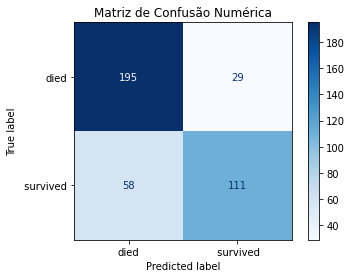

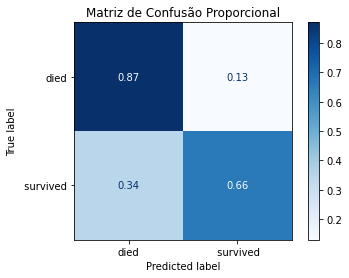

In [40]:
titulos_ = [
    ("Matriz de Confusão Numérica", None),
    ("Matriz de Confusão Proporcional", "true"),
]
legenda = "died, survived".split(",")
for titulo, normalizacao in titulos_:
    disp = ConfusionMatrixDisplay.from_estimator(
        floresta,
        X_test,
        y_test,
        display_labels=legenda,
        cmap=plt.cm.Blues,
        normalize=normalizacao,
    )
    disp.ax_.set_title(titulo)


plt.show()